In [1]:
# Definitions and functions
%matplotlib inline
from __future__ import division
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import wave
import struct
import h5py
from scipy.io import wavfile
from scipy.signal import spectrogram
import logging
from IPython.display import display
matplotlib.style.use('ggplot')
from ipywidgets import *
import yaml
import numpy.lib.recfunctions as rfn 
import numpy.matlib as npm
import glob
from __future__ import division
# Check wich computer to decide where the things are mounted
comp_name=socket.gethostname()
print('Computer: ' + comp_name)

if 'txori' in comp_name or 'passaro' in comp_name or 'lintu' in comp_name:
    repos_folder = os.path.abspath('/mnt/cube/earneodo/repos')
    experiment_folder = os.path.join('/mnt/cube/earneodo/bci_zf/')

sys.path.append(os.path.join(repos_folder, 'soundflow', 'sound_tools'))
sys.path.append(os.path.join(repos_folder, 'ephysflow'))
sys.path.append(os.path.join(repos_folder, 'swissknife'))


import soundtools as st
from swissknife.bci.core import expstruct as et
from swissknife.bci.core import kwik_functions as kwkf
from swissknife.bci.core.file import h5_functions as h5f
from swissknife.bci import synthetic as syn
from swissknife.bci import unitmeta as um
from swissknife.bci import stimalign as sta

from swissknife.streamtools import streams as st
from swissknife.streamtools import spectral as sp

from basic_viewing import events as evt
from basic_viewing.units import Unit
from basic_viewing.structure.core.basic_plot import plot_raster, sparse_raster
from basic_viewing.structure.core import basic_plot as bp
#from basic_viewing.structure import kwik_functions as kwf
from swissknife.decoder import linear as ld

logger = logging.getLogger()
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.INFO)
logger.info('all modules loaded')

Computer: passaro


2017-05-30 10:10:16,536 root         INFO     all modules loaded


In [2]:
# bird and session
bird = 'b1114'
sess = 'day-morning_2017-02-23_50'
syn_sess = 2
# bird = 'z020'
# sess = 'day-2016-06-03'

exp_par = et.get_parameters(bird, sess)
fn = et.file_names(bird, sess)
#song_file_path = et.file_path(fn, 'ss', 'sng')
#song_file = h5py.File(song_file_path, 'r')
kwik_file = et.open_kwik(bird, sess)
kwd_file = et.open_kwd(bird, sess)
s_f = h5f.get_record_sampling_frequency(kwd_file)

In [3]:
# load the clustered syllables from this session
import pickle
bird_folder = os.path.split(fn['folders']['proc'])[0]
bird_syl=pd.read_pickle(os.path.join(bird_folder, 'syllables.pickle'))
sess_syl = bird_syl[[sess in f for f in bird_syl.recon_folder]]

In [6]:
sess_syl

,bird_name,recon_folder,recon_length,recon_t_rel_wav,specs,syllable_time,syllable_z_log,sequence_num,day_num,sequence_syllable,syllable_labels,old_labels,Holdout
10,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.399139,3246.410156,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.27087129...",2000-01-01 14:54:06.410264,"[3.78669237564, 1.74056245541]",460,0,33,133,133,Training
19,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.481872,1979.444092,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0415954589844...",2000-01-02 00:32:59.444111,"[1.28095438989, 0.742495476142]",487,1,7,196,-1,Training
38,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.153943,2816.291260,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2000-01-01 18:46:56.291283,"[-0.984004926149, 5.7846528954]",474,0,8,339,-1,Training
45,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.625733,2704.525146,"[0.0, 0.0, 0.0, 0.0, 0.0, 9.97465998687e-18, 0...",2000-01-01 18:45:04.525078,"[1.44223448012, -3.68050461382]",473,0,12,46,46,Training
55,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.977543,1330.293701,"[0.0, 0.0, 0.0, 0.0186309814453, 0.37078356742...",2000-01-01 14:22:10.293649,"[-5.69743112777, -2.2581712648]",451,0,7,29,29,Testing
60,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,1.595105,3219.570068,"[0.0, 0.00521087646484, 0.0587544888258, 0.172...",2000-01-01 14:53:39.570116,"[-6.32636319734, 1.36786450319]",460,0,3,65,65,Training
77,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.351332,1105.263062,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.77...",2000-01-01 18:18:25.263036,"[2.6316968295, 3.17141149088]",466,0,23,206,-1,Testing
84,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.495153,1583.870972,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0199584960938...",2000-01-01 14:26:23.870982,"[3.3868278272, -2.00369921746]",452,0,57,22,22,Testing
94,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.331095,2447.636230,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.131...",2000-01-01 14:40:47.636192,"[3.58371096751, 3.28503836829]",456,0,32,95,95,Training
101,b1114_phys,/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-mo...,0.613961,713.116943,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0138702392578, 0.1...",2000-01-01 21:11:53.116944,"[-0.364492812777, -2.03464690453]",476,0,55,104,-1,Training


In [10]:
sess_syl[:1].recon_folder.tolist()

['/mnt/cube/earneodo/bci_zf/ss_data/b1114/day-morning_2017-02-23_50/experiment-rec_004.mic.wav']

In [11]:
def syllable_meta(all_syl):
    all_labels = np.unique(sess_syl.syllable_labels)
    all_count = [np.sum(all_syl.syllable_labels==i) for i in all_labels]
    all_len = [np.mean(all_syl[all_syl.syllable_labels==i].recon_length) for i in all_labels]
    all_std = [np.std(all_syl[all_syl.syllable_labels==i].recon_length) for i in all_labels]
    return pd.DataFrame({
            'label': all_labels,
            'count': np.array(all_count, dtype=np.int),
            'length': np.array(all_len),
            'length_std': np.array(all_std),
        }).sort_values('count', ascending=False)

def starting_points(all_syl, syl_clu, s_f=30000):
    syl_hits = all_syl[all_syl.syllable_labels==syl_clu]
    starts_s = np.array(syl_hits.recon_t_rel_wav.tolist())
    recs_long = syl_hits.recon_folder.tolist()
    
    # starts to samples
    starts_samples = np.round(starts_s*s_f).astype(np.int64)
    recs = np.array([int(rec_long.split('rec_')[-1].split('.mic')[0]) for rec_long in recs_long])
    
    #return np.array({'start': starts_samples, 'rec': recs}).sort_values('rec')
    rs = np.zeros(recs.size, dtype=[('start', np.int64), ('rec', np.int)])
    rs['start'] = starts_samples
    rs['rec'] = recs
    return rs
    #return np.recarray([starts_samples, recs], dtype=[('start', np.int64), ('rec', np.int)])
    
class FakeEvent:
    def __init__(self, starts, recs):
        self.starts = starts
        self.recs = recs
        
    def get_start(self):
        return self.starts
    
    def get_rec(self):
        return self.recs

In [12]:
# get count of each syllable cluster
syl_meta = syllable_meta(sess_syl)
syl_meta

,count,label,length,length_std
0,59,2,0.609709,0.008408
38,44,83,0.551963,0.007748
128,37,242,0.332604,0.010307
85,35,164,0.812608,0.069923
54,34,106,0.785003,0.045889
7,34,22,0.515534,0.034083
64,34,128,0.631460,0.042385
44,33,95,0.333030,0.002430
28,32,69,0.427444,0.012803
87,32,171,0.847661,0.068440


In [22]:
# get all starts of a syllable
syl_clu = 2
syl_starts = starting_points(sess_syl, syl_clu)
syl_starts

array([( 33049578, 5), ( 59679082, 2), ( 29364983, 3), ( 26427061, 4),
       ( 26454606, 4), ( 65291887, 5), ( 73218669, 4), ( 28805755, 2),
       ( 40333905, 4), ( 34034938, 5), ( 39340118, 5), ( 60562039, 3),
       ( 92299651, 4), ( 28861901, 2), (118352974, 4), ( 62071919, 4),
       ( 39368738, 5), ( 78383159, 4), ( 38848367, 2), ( 36863701, 4),
       ( 40362404, 4), (  7481349, 4), (118324585, 4), ( 92243438, 4),
       ( 60068712, 5), ( 20910784, 3), ( 60534302, 3), ( 60097705, 5),
       ( 28833860, 2), ( 39311052, 5), ( 14680803, 3), ( 81574673, 5),
       ( 21959445, 4), ( 33077743, 5), ( 59707050, 2), ( 21988510, 4),
       ( 69486892, 5), ( 78354683, 4), ( 36891676, 4), ( 34006633, 5),
       ( 29337332, 3), ( 33106615, 5), ( 81603289, 5), ( 60040038, 5),
       ( 69458145, 5), ( 21932558, 4), ( 14653026, 3), ( 33257443, 2),
       ( 33229446, 2), ( 92271357, 4), ( 34063949, 5), (118296511, 4),
       ( 69429331, 5), ( 65320642, 5), ( 73246714, 4), (  7509258, 4),
      

In [14]:
syl_clu = 83
syl_starts = starting_points(sess_syl, syl_clu)
syl_evt = FakeEvent(syl_starts['start'], syl_starts['rec'])

601.166666667
fcut_plot 10000


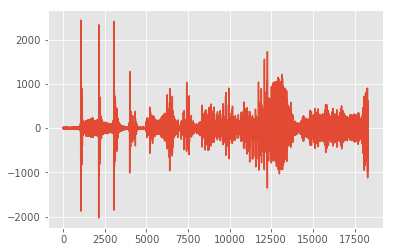

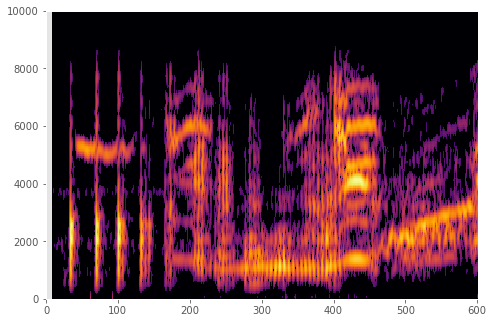

In [23]:
# view one such syllable
syl_ex = 0
before = 0
length = int(s_f * syl_meta[syl_meta.label==2].length.tolist()[0])
after = 0

spectrogram_pars={'n_window': 512,
                 'n_overlap': 511,
                 'sigma': 30,
                 'f_cut': 10000,
                 'db_cut': 0.000065 }
filter_band = [500, 7500]

#ch_list = np.arange(exp_par['channel_config']['mic'])
ch_list = np.array(exp_par['channel_config']['mic'])

syl_start = syl_starts['start'][syl_ex]
syl_rec = syl_starts['rec'][syl_ex]

syl_rec_dset = h5f.get_data_set(kwd_file, syl_rec)



syl_rec_data = st.H5Data(syl_rec_dset, s_f, 
                         dtype=np.float, 
                         chan_list=ch_list)

syl_chunk = st.Chunk(syl_rec_data, 
                     chan_list=ch_list, 
                     segment=[syl_start-before, syl_start + length + after])



filter_pars = sp.make_butter_bandpass(s_f, filter_band[0], filter_band[1])

syl_chunk.apply_filter(sp.apply_butter_bandpass, filter_pars)
plt.plot(syl_chunk.data);
spec_obj = sp.Spectrogram(syl_chunk.data, s_f, **spectrogram_pars)
ax = spec_obj.plot()

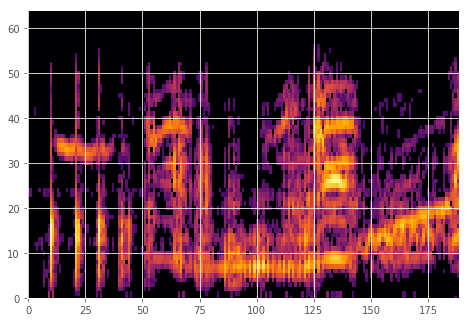

In [24]:
def plot_spectrogram(x, before_ms, after_ms, s_f, n_window = 192, n_overlap = None, sigma=None, ax=None, **kwargs):
    
    if n_overlap is None:
        n_overlap = n_window/2
    if sigma is None:
        sigma = 1./1000.*s_f
    
    # Make the spectrogram
    f, t, Sxx = spectrogram(x, s_f, nperseg = n_window, noverlap=n_overlap, window = sg.gaussian(n_window, sigma), 
                            scaling='spectrum')
    
    Sxx[[Sxx<np.max((Sxx)*0.000065)]]=1

    span_before = np.zeros((Sxx.shape[0], np.int(before_ms/1000. * s_f)))
    span_after = np.zeros((Sxx.shape[0], np.int(after_ms/1000. * s_f) + x.size - Sxx.shape[1]))
    span_before[:] = np.nan
    span_after[:] = np.nan
    #Sxx = np.hstack((span_before, (Sxx), span_after))
    
    if ax is None:
        spec_fig = plt.figure()
        ax = spec_fig.add_axes([0, 0, 1, 1])
        
    #ax.pcolormesh(((t-0.5*n_window/s_f)*1000.), f, np.log(Sxx), rasterized=True, cmap='inferno')
    s_plt = ax.imshow(np.log(Sxx), aspect='auto', cmap='inferno')
    #ax.set_xlim(-before_ms, after_ms + int(x.size/s_f * 1000.))
    ax.set_ylim(0,64)
    #ax.plot((span_before.shape[1], span_before.shape[1]), (np.min(f), np.max(f)), 'k--')
    
    return Sxx, ax, s_plt

s, a, p = plot_spectrogram(syl_chunk.data, 100, 100, 30000);

In [25]:
np.sum(f<10000)

0

In [26]:
# Neural data
all_sess_units = um.list_sess_units(bird, sess)
shank = 0

kwik_file = et.open_kwik(bird, sess)
all_units = kwkf.list_units(kwik_file, group=shank, sorted=False)
units_list = [Unit(clu, kwik_file=kwik_file) for clu in all_units.clu]

# this returns a numpy recarray with cols:
# group: site group (electrode shank)
# clu: cluster number
# qlt: sorting quality: 1 is MUA, 2 is well isolated (by default, only these 2 qlt's are returned)
# For instance, see all the clusters that are either mua or good units.
print(all_units['clu'])


[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52 53
 54 55 56 57 58 59  6 60 61 62 63  7  8  9]


<function ipywidgets.widgets.interaction.<lambda>>

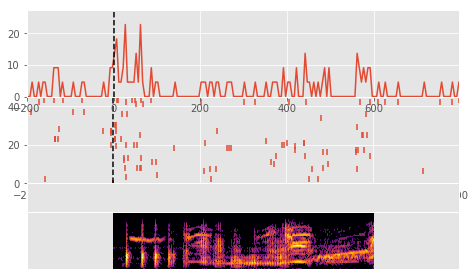

In [27]:
def plot_spectrogram(x, before_ms, after_ms, s_f, n_window = 192, n_overlap = None, sigma=None, ax=None, **kwargs):
    if n_overlap is None:
        n_overlap = n_window/2
    if sigma is None:
        sigma = 1./1000.*s_f
    
    # Make the spectrogram
    f, t, Sxx = spectrogram(x, s_f, nperseg = n_window, noverlap=n_overlap, window = sg.gaussian(n_window, sigma), scaling='spectrum')
    Sxx[[Sxx<np.max((Sxx)*0.000065)]]=1

    span_before = np.zeros((Sxx.shape[0], np.int(before_ms/1000. * s_f)))
    span_after = np.zeros((Sxx.shape[0], np.int(after_ms/1000. * s_f) - Sxx.shape[1]))
    span_before[:] = np.nan
    span_after[:] = np.nan
    #Sxx = np.hstack((span_before, (Sxx), span_after))
    
    if ax is None:
        spec_fig = plt.figure()
        ax = spec_fig.add_axes([0, 0, 1, 1])
        
    ax.pcolormesh(((t-0.5*n_window/s_f)*1000.), f, np.log(Sxx), rasterized=True, cmap='inferno')
    ax.set_xlim(-before_ms, after_ms)
    ax.set_ylim(0,10000)
    #ax.plot((span_before.shape[1], span_before.shape[1]), (np.min(f), np.max(f)), 'k--')
    
    return Sxx, ax

def plot_waveform(x, before_ms, after_ms, s_f, ax=None):
    span_before = np.zeros(np.int(before_ms/1000. * s_f))
    span_before[:] = np.nan
    span_after = np.zeros(np.int(after_ms/1000. * s_f) - x.size)
    waveform_plot = np.insert(x, 0, span_before)
    waveform_plot = np.insert(span_after, 0, waveform_plot)
    waveform_t_plot = np.arange(waveform_plot.size)*1000./s_f
    if ax is None:
        raster_fig = plt.figure()
        ax = raster_fig.add_axes([0, 0, 1, 1])
    ax.plot(waveform_plot)
    ax.set_xlim(0, waveform_plot.size)
    ax.plot((span_before.size, span_before.size), (np.min(waveform_plot), np.max(waveform_plot)), 'k--')
    return ax

def plot_one_raster(unit_clu):
    # instance a Unit object
    unit = Unit(unit_clu, kwik_file=kwik_file)
    # get the spike times (in sample units)
    unit.get_time_stamps()
    # get the sampling rate of the recording
    s_f = unit.sampling_rate
    #get a raster for this unit around a window of [-2, 4] sec after each stimulus onset
    before_ms = 1000
    after_ms = 1600
    start_points = m_starts - np.int(s_f * before_ms/1000.) #start_points has to be in sample units
    rs = unit.get_raster(start_points, before_ms + after_ms, span_is_ms=True, return_ms=True)
    # the raster is an n_trial * m array (where m can be sample or ms).
    # in each row, it contains the timestamps (in samples or ms) of spikes relative to the beginning of the trial
    # plot the raster
    b = np.outer((np.arange(rs.shape[0]) + 1), np.ones(rs.shape[1]))
    plt.figure(unit_clu)
    plt.scatter(rs, b, marker='|', rasterized=True)
    plt.xlim(0, before_ms + after_ms)
    plt.show
    
class VizUnit():
    def __init__(self, all_units, pattern_chunk, event):
        self.unit = None
        self.raster = None
        self.clu = all_units['clu']
        self.all_units = all_units
        self.all_rasters = None
        self.is_good = Checkbox()
        self.fig = None
        self.fig_width = 1
        self.fig_ax = {}
        self.fig_plt = {}
        self.pattern_chunk = pattern_chunk
        self.pattern = pattern_chunk.data.reshape(pattern_chunk.data.size,)
        self.before_ms = 200
        self.after_ms = 800
        self.start_points = None
        self.s_f = 30000
        self.spectr = None
        self.event = None
        #display(self.is_bout)
        
        self.init_event(event)
        self.init_units()
        
        self.init_fig()
        
    def show(self, i):
        i_clu = i
        self.select_unit(i_clu)
        print 'selected unit {0}'.format(i_clu)
        ax1 = self.fig_ax['raster']
        ax2 = self.fig_ax['histogram']
        ax1.cla()
        ax2.cla()
        rast, ax1 = plot_raster(sparse_raster(self.raster), t0=self.before_ms, ax=ax1)
        rast, ax2 = plot_raster(sparse_raster(self.raster), t0=self.before_ms, bin_size=5, ax=ax2)
        display(self.fig)
    
    def select_unit(self, unit_clu):
        #self.unit = Unit(unit_clu, kwik_file=kwik_file)
#         self.raster = self.unit.get_raster(self.start_points, self.before_ms + self.after_ms, 
#                                           span_is_ms=True, return_ms=True)
        self.raster = self.all_rasters[unit_clu]
    
    def init_event(self, event):
        self.event = event
        m_starts = kwkf.apply_rec_offset(kwik_file, self.event.get_start(), self.event.get_rec())
        self.start_points = m_starts - np.int(self.s_f * self.before_ms/1000.)
        
    def init_fig(self):
        self.fig = plt.figure()
        self.fig_ax['raster'] = self.fig.add_axes([0,.3,self.fig_width,0.3])
        self.fig_ax['histogram'] = self.fig.add_axes([0,.6,self.fig_width,0.3])
        self.fig_ax['spectrogram'] = self.fig.add_axes([0,0,self.fig_width,0.2])
        self.fig_ax['synthesis'] = self.fig.add_axes([0,.2,self.fig_width,0.1])

        for ax in self.fig_ax.itervalues():
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
        self.update_spectrogram()
        #self.update_synth_plot()
        
    def init_units(self):
        self.all_rasters = {}
        for unit_clu in self.all_units.clu:
            unit = Unit(unit_clu, kwik_file=kwik_file)
            self.all_rasters[unit_clu] = unit.get_raster(self.start_points, self.before_ms + self.after_ms, 
                                           span_is_ms=True, return_ms=True)

    def update_spectrogram(self):
        ax = self.fig_ax['spectrogram']
        m_chunk = self.pattern_chunk
#         self.spectr, ax, plt = plot_spectrogram(m_chunk.data.reshape(m_chunk.data.size,), 
#                                            self.before_ms, self.after_ms, m_chunk.sound.s_f, 
#                                            ax=ax, 
#                                            n_window = 192, n_overlap=192-1, scaling='spectrum')
        plot_spectrogram(m_chunk.data.reshape(m_chunk.data.size,), 
                                           self.before_ms, self.after_ms, m_chunk.sound.s_f, 
                                           ax=ax, 
                                           n_window = 192, n_overlap=192-1, scaling='spectrum')
        #self.fig_plt['spectrogram'] = plt
        
    def update_synth_plot(self):
        ax = self.fig_ax['synthesis']
        ax = plot_waveform(alpha[192:,], self.before_ms, self.after_ms, m_chunk.sound.s_f, ax=ax)
        ax = plot_waveform(beta[192:,], self.before_ms, self.after_ms, m_chunk.sound.s_f, ax=ax)
        
        
        
    def bout_checked(self, bc):
#         print "bout checked"
#         print bc['new']
#         print self.motiff
        self.candidates.set_value(self.motiff, 'bout', bc['new'])
    # inspect the result

vu = VizUnit(all_units, syl_chunk, syl_evt)
widgets.interact(vu.show, i=(0, all_units['clu'].size-1, 1))

In [20]:
vu.all_units.clu

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59,  6, 60, 61, 62, 63,  7,  8,  9])

In [16]:
fig_fname = os.path.join(os.path.split(m_path)[0], 'rasters_{}.eps'.format(vu.unit.clu))
vu.fig.savefig(fig_fname, format='eps', dpi=100)

In [17]:
trials_train = np.arange(65)
trials_test = np.arange(65, 71)

In [18]:
logger.setLevel(logging.INFO)

In [26]:
#make a fit
from basic_viewing import units as u
reload(ld)
reload(u)

motiff_starts_kwik = kwkf.apply_rec_offset(kwik_file, vu.event.get_start(), vu.event.get_rec())
all_units_list = [Unit(clu, kwik_file=kwik_file) for clu in all_units.clu]

bin_size = 4
history_bins = 10


bin_size_samples = int(bin_size*s_f/1000.)

trials_train = np.arange(71)
trials_test = np.arange(65, 71)

units_list = u.filter_unit_list(all_units_list, u.no_singularity_filter, 
                                motiff_starts_kwik[trials_train], len_samples,
                             bin_size=bin_size,
                              s_f=s_f,
                             history_bins=history_bins)

model_pars = bp.col_binned(np.array([alpha, beta, envelope]), bin_size_samples)/bin_size_samples

sv, sv_units = u.support_vector(motiff_starts_kwik[trials_train], len_samples, units_list, 
                      bin_size=bin_size, 
                      history_bins=history_bins+1)

#plt.plot(sv[43,:,:].sum(axis=1))
#target = np.tile(model_pars[1], trials_train.size).reshape(trials_train.size, -1)
targets = [np.tile(p, trials_train.size).reshape(trials_train.size, -1) for p in model_pars]
targets[1] = syn.np_mulog(targets[1])
#f = ld.fit_kernel(sv, target, history_bins+1)
target = targets[1]



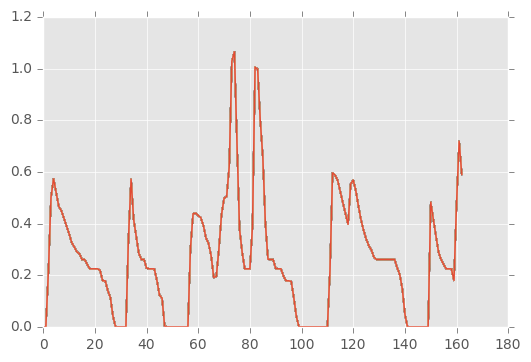

In [27]:
plt.plot(targets[1].T);

In [21]:
from decoder import neural as nd
reload(nd)
X_train, Y_train, X_test, Y_test = nd.sup_to_keras(sv, target, history_bins, n_test=10)

2017-02-07 01:51:10,457 decoder.datashape WARNING  Size mismatch between target and support vector
2017-02-07 01:51:12,068 decoder.neural INFO     Train vector sizes (19886, 2800) and (19886,)
2017-02-07 01:51:12,069 decoder.neural INFO     Test vector sizes (3260, 2800) and (3260,)


In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [26]:
n_feat = X_train.shape[1]
n_test = 10

model = Sequential()
model.add(Dense(32, input_dim=n_feat, init='uniform', activation='relu'))
model.add(Dense(1, init='normal'))
model.compile(loss='mean_absolute_error', optimizer='rmsprop')



model.fit(X_train, Y_train, nb_epoch=300, batch_size=10, verbose=2, validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size=10)

Train on 17897 samples, validate on 1989 samples
Epoch 1/300
5s - loss: 0.0858 - val_loss: 0.0683
Epoch 2/300
4s - loss: 0.0554 - val_loss: 0.0636
Epoch 3/300
4s - loss: 0.0468 - val_loss: 0.0646
Epoch 4/300
4s - loss: 0.0414 - val_loss: 0.0586
Epoch 5/300
4s - loss: 0.0380 - val_loss: 0.0627
Epoch 6/300
4s - loss: 0.0350 - val_loss: 0.0579
Epoch 7/300
4s - loss: 0.0332 - val_loss: 0.0602
Epoch 8/300
4s - loss: 0.0316 - val_loss: 0.0589
Epoch 9/300
4s - loss: 0.0298 - val_loss: 0.0594
Epoch 10/300
4s - loss: 0.0290 - val_loss: 0.0572
Epoch 11/300
4s - loss: 0.0281 - val_loss: 0.0606
Epoch 12/300
4s - loss: 0.0267 - val_loss: 0.0615
Epoch 13/300
4s - loss: 0.0264 - val_loss: 0.0579
Epoch 14/300
4s - loss: 0.0256 - val_loss: 0.0627
Epoch 15/300
4s - loss: 0.0252 - val_loss: 0.0600
Epoch 16/300
4s - loss: 0.0248 - val_loss: 0.0600
Epoch 17/300
4s - loss: 0.0239 - val_loss: 0.0623
Epoch 18/300
4s - loss: 0.0237 - val_loss: 0.0619
Epoch 19/300
4s - loss: 0.0231 - val_loss: 0.0605
Epoch 20/3

In [24]:
import threading
from pycuda import driver

In [32]:
from threadtools import threadedfunction as td

def fit_ffnn(sup_vec, target, hist_bins, hid_dim, 
             n_test=10,
             nb_epoch=500, 
             batch_size=15):
    X_train, Y_train, X_test, Y_test = nd.sup_to_keras(sup_vec, target, history_bins, n_test=n_test)
    n_feat = X_train.shape[1]
    model = Sequential()
    model.add(Dense(hid_dim, input_dim=n_feat, init='uniform', activation='relu'))
    model.add(Dense(1, init='normal'))
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')
    model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, verbose=2, validation_split=0.1)
    
    return model, model.predict(X_test, batch_size=15)



ft = [fit_ffnn(sv, t, history_bins, 30) for t in targets]
    


2017-02-07 02:18:07,966 decoder.datashape WARNING  Size mismatch between target and support vector
2017-02-07 02:18:08,112 decoder.neural INFO     Train vector sizes (9943, 560) and (9943,)
2017-02-07 02:18:08,113 decoder.neural INFO     Test vector sizes (1630, 560) and (1630,)


Train on 8948 samples, validate on 995 samples
Epoch 1/500
1s - loss: 0.0716 - val_loss: 0.0654
Epoch 2/500
1s - loss: 0.0478 - val_loss: 0.0453
Epoch 3/500
1s - loss: 0.0383 - val_loss: 0.0427
Epoch 4/500
1s - loss: 0.0326 - val_loss: 0.0427
Epoch 5/500
1s - loss: 0.0286 - val_loss: 0.0386
Epoch 6/500
1s - loss: 0.0258 - val_loss: 0.0415
Epoch 7/500
1s - loss: 0.0234 - val_loss: 0.0368
Epoch 8/500
1s - loss: 0.0218 - val_loss: 0.0345
Epoch 9/500
1s - loss: 0.0197 - val_loss: 0.0335
Epoch 10/500
1s - loss: 0.0189 - val_loss: 0.0345
Epoch 11/500
1s - loss: 0.0179 - val_loss: 0.0338
Epoch 12/500
1s - loss: 0.0172 - val_loss: 0.0334
Epoch 13/500
1s - loss: 0.0165 - val_loss: 0.0335
Epoch 14/500
1s - loss: 0.0162 - val_loss: 0.0327
Epoch 15/500
1s - loss: 0.0156 - val_loss: 0.0333
Epoch 16/500
1s - loss: 0.0152 - val_loss: 0.0332
Epoch 17/500
1s - loss: 0.0148 - val_loss: 0.0337
Epoch 18/500
1s - loss: 0.0143 - val_loss: 0.0350
Epoch 19/500
1s - loss: 0.0140 - val_loss: 0.0337
Epoch 20/500

2017-02-07 02:29:25,514 decoder.datashape WARNING  Size mismatch between target and support vector
2017-02-07 02:29:25,621 decoder.neural INFO     Train vector sizes (9943, 560) and (9943,)
2017-02-07 02:29:25,622 decoder.neural INFO     Test vector sizes (1630, 560) and (1630,)


1s - loss: 0.0051 - val_loss: 0.0422
Train on 8948 samples, validate on 995 samples
Epoch 1/500
1s - loss: 0.1208 - val_loss: 0.1026
Epoch 2/500
1s - loss: 0.0942 - val_loss: 0.0940
Epoch 3/500
1s - loss: 0.0802 - val_loss: 0.0858
Epoch 4/500
1s - loss: 0.0714 - val_loss: 0.0816
Epoch 5/500
1s - loss: 0.0639 - val_loss: 0.0820
Epoch 6/500
1s - loss: 0.0594 - val_loss: 0.0742
Epoch 7/500
1s - loss: 0.0556 - val_loss: 0.0898
Epoch 8/500
1s - loss: 0.0518 - val_loss: 0.0779
Epoch 9/500
1s - loss: 0.0500 - val_loss: 0.0751
Epoch 10/500
1s - loss: 0.0477 - val_loss: 0.0755
Epoch 11/500
1s - loss: 0.0455 - val_loss: 0.0735
Epoch 12/500
1s - loss: 0.0442 - val_loss: 0.0733
Epoch 13/500
1s - loss: 0.0428 - val_loss: 0.0762
Epoch 14/500
1s - loss: 0.0407 - val_loss: 0.0767
Epoch 15/500
1s - loss: 0.0397 - val_loss: 0.0743
Epoch 16/500
1s - loss: 0.0385 - val_loss: 0.0733
Epoch 17/500
1s - loss: 0.0380 - val_loss: 0.0739
Epoch 18/500
1s - loss: 0.0365 - val_loss: 0.0744
Epoch 19/500
1s - loss: 0

2017-02-07 02:40:47,538 decoder.datashape WARNING  Size mismatch between target and support vector


1s - loss: 0.0134 - val_loss: 0.0847


2017-02-07 02:40:47,648 decoder.neural INFO     Train vector sizes (9943, 560) and (9943,)
2017-02-07 02:40:47,649 decoder.neural INFO     Test vector sizes (1630, 560) and (1630,)


Train on 8948 samples, validate on 995 samples
Epoch 1/500
1s - loss: 1.1958 - val_loss: 1.1513
Epoch 2/500
1s - loss: 1.0744 - val_loss: 1.0494
Epoch 3/500
1s - loss: 0.9657 - val_loss: 1.0226
Epoch 4/500
1s - loss: 0.8424 - val_loss: 0.8420
Epoch 5/500
1s - loss: 0.7553 - val_loss: 0.8036
Epoch 6/500
1s - loss: 0.7037 - val_loss: 0.7781
Epoch 7/500
1s - loss: 0.6639 - val_loss: 0.7620
Epoch 8/500
1s - loss: 0.6306 - val_loss: 0.7254
Epoch 9/500
1s - loss: 0.5965 - val_loss: 0.7166
Epoch 10/500
1s - loss: 0.5673 - val_loss: 0.7160
Epoch 11/500
1s - loss: 0.5328 - val_loss: 0.6882
Epoch 12/500
1s - loss: 0.5069 - val_loss: 0.6983
Epoch 13/500
1s - loss: 0.4860 - val_loss: 0.6597
Epoch 14/500
1s - loss: 0.4602 - val_loss: 0.6742
Epoch 15/500
1s - loss: 0.4424 - val_loss: 0.6630
Epoch 16/500
1s - loss: 0.4246 - val_loss: 0.6586
Epoch 17/500
1s - loss: 0.4108 - val_loss: 0.6539
Epoch 18/500
1s - loss: 0.3973 - val_loss: 0.6659
Epoch 19/500
1s - loss: 0.3833 - val_loss: 0.6828
Epoch 20/500

In [47]:
ft[0][1]

array([[ 0.00542057],
       [ 0.        ],
       [ 0.0999008 ],
       ..., 
       [ 0.30000001],
       [ 0.30000001],
       [ 0.15021168]], dtype=float32)

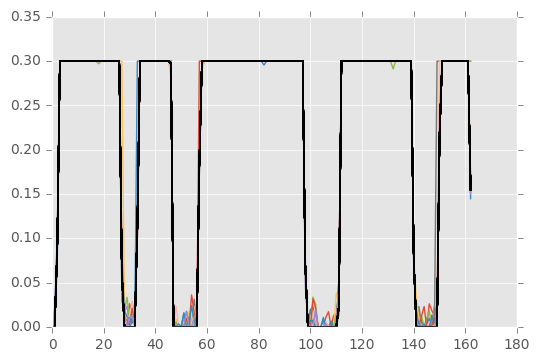

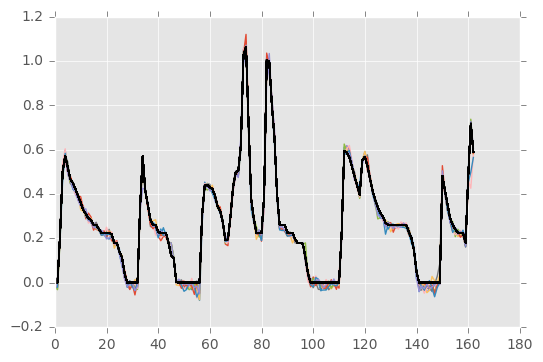

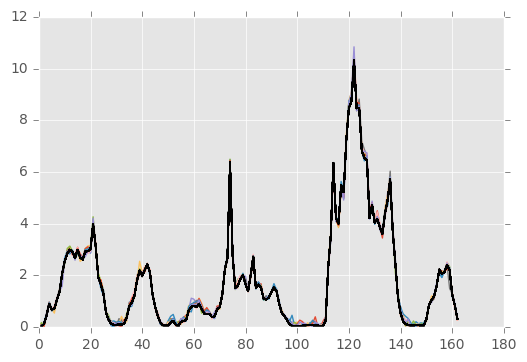

In [48]:
fit_pars = []
for i, fit in enumerate(ft):
    pred = fit[1]
    target = targets[i]
    fg = plt.figure()
    all_fits = np.reshape(pred.flatten(), (10, -1))
    plt.plot(all_fits.T);
    fit_pars.append(all_fits[0,:])
    plt.plot((target.T), 'k');

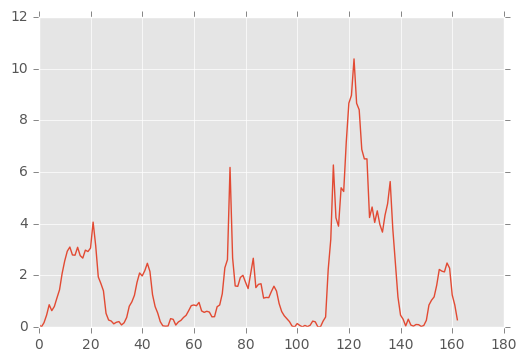

In [51]:
plt.plot(fit_pars[2])

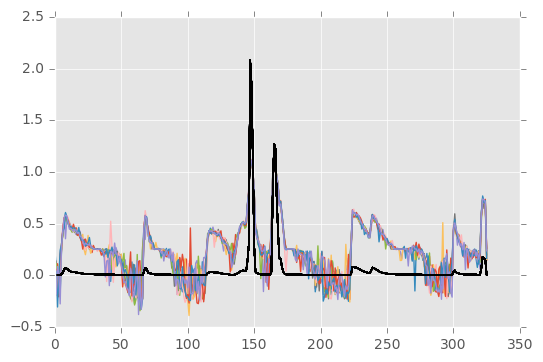

In [170]:
pred = model.predict(X_test, batch_size=15)
plt.plot(syn.np_mulog(np.reshape(pred.flatten(), (10, -1)).T))
plt.plot((target.T), 'k');

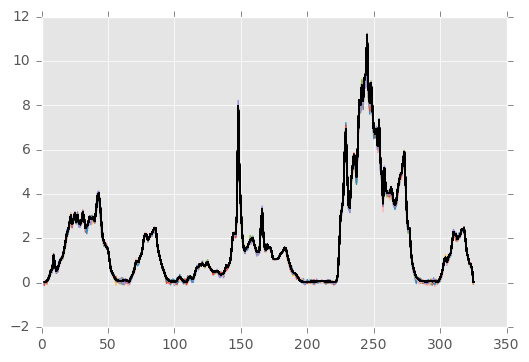

In [136]:
pred = model.predict(X_test, batch_size=15)
plt.plot(np.reshape(pred.flatten(), (10, -1)).T);
plt.plot(target.T, 'k');

In [92]:
def transform_env(x):
    x[x<0] = 0
    return x

def transform_alpha(x):
    x[x<0.15] = 0
    x[x>=.15] = .3
    return x

def transform_beta(x):
    x[x<0] = 0
    return x

def mu_transform_beta(x):
    x[x<0] = 0
    return syn.np_mulog_inv(x, 256)


def resample_no_interp(x, s_f, new_s_f, axis=0):
    assert(new_s_f>=s_f)
    n_repeats = np.int(np.ceil(new_s_f/s_f))
    return np.repeat(x, n_repeats, axis=axis)

def resample_interp(y, s_f, new_s_f):
    print s_f
    t = np.arange(y.size)/s_f
    print t[-1]
    print 1./new_s_f
    t_interp = np.arange(t[-1]*new_s_f)/new_s_f
    f = sp.interpolate.interp1d(t, y, kind='linear')
    return f, t, t_interp

def latent_to_stream(onof, beta, alpha):
    onof[onof>.3] = .3
    onof[onof<0] = 0
    alpha[alpha<0]=0
    alpha=alpha*1000.
    return np.vstack([0.15 - onof, -beta, alpha]).T


In [93]:
all_pars = latent_to_stream(fit_pars[0], syn.np_mulog_inv(fit_pars[1]), fit_pars[2])
res_pars = resample_no_interp(all_pars, 1000./bin_size, 44100.)

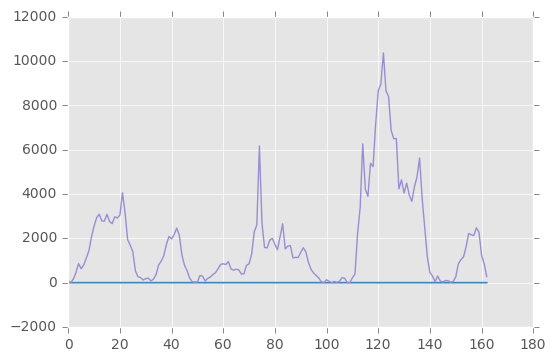

In [94]:
plt.plot(all_pars);

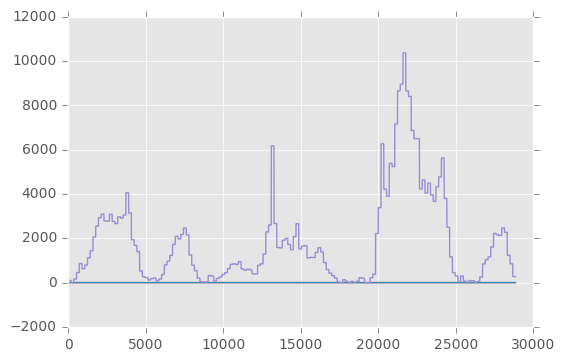

In [95]:
plt.plot(res_pars);

In [100]:
np.max(s_s[:, 0])

10373.494140625

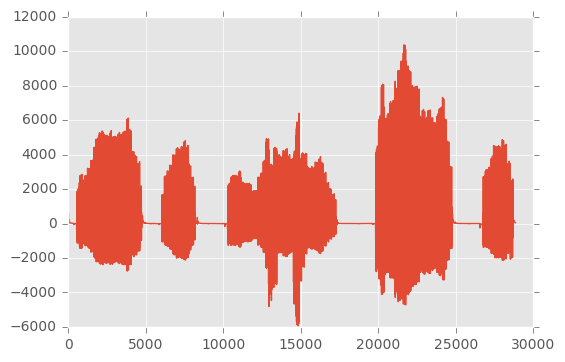

In [96]:
from dynamo import finch as zf
s_s = zf.make_song(res_pars)
plt.plot(s_s[:, 0])

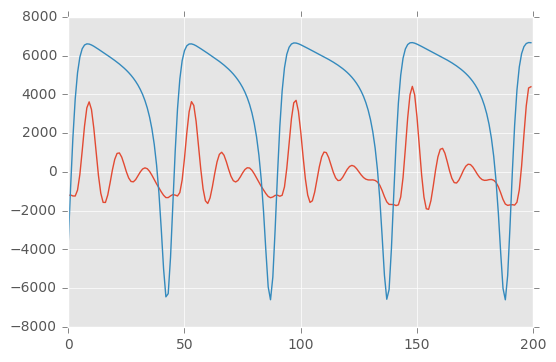

In [97]:
plt.plot(s_s[1500:1700, :])

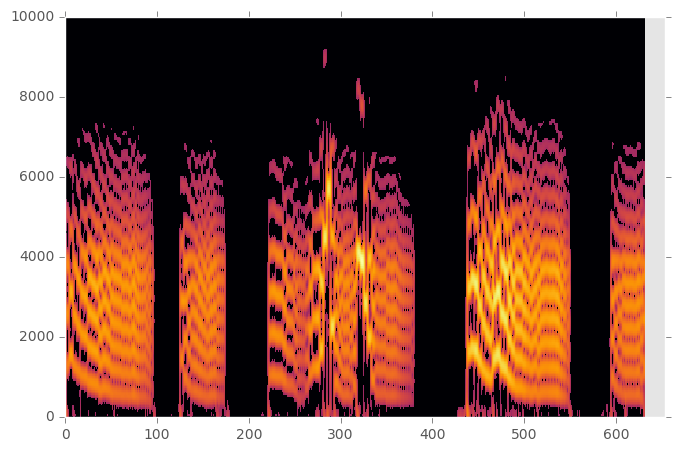

In [98]:
def plot_spectrogram(x, before_ms, after_ms, s_f, n_window = 192, n_overlap = None, sigma=None, ax=None, **kwargs):
    
    if n_overlap is None:
        n_overlap = n_window/2
    if sigma is None:
        sigma = 1./1000.*s_f
    
    # Make the spectrogram
    f, t, Sxx = spectrogram(x, s_f, nperseg = n_window, noverlap=n_overlap, window = sg.gaussian(n_window, sigma), 
                            scaling='spectrum')
    
    Sxx[[Sxx<np.max((Sxx)*0.000065)]]=1

    span_before = np.zeros((Sxx.shape[0], np.int(before_ms/1000. * s_f)))
    span_after = np.zeros((Sxx.shape[0], np.int(after_ms/1000. * s_f) + x.size - Sxx.shape[1]))
    span_before[:] = np.nan
    span_after[:] = np.nan
    #Sxx = np.hstack((span_before, (Sxx), span_after))
    
    if ax is None:
        spec_fig = plt.figure()
        ax = spec_fig.add_axes([0, 0, 1, 1])
        
    ax.pcolormesh(((t-0.5*n_window/s_f)*1000.), f, np.log(Sxx), rasterized=True,
                 cmap='inferno')
    ax.set_xlim(-before_ms, after_ms + int(x.size/s_f * 1000.))
    ax.set_ylim(0,10000)
    #ax.plot((span_before.shape[1], span_before.shape[1]), (np.min(f), np.max(f)), 'k--')
    
    return Sxx, ax

spectr_bos, ax = plot_spectrogram(s_s[:, 0], 
                                   0, 0, 44100,
                                   n_window = 1024, n_overlap=1024-1, scaling='spectrum')

In [106]:
ax.figure.savefig(fig_fname, format='eps', dpi=300)

In [105]:
fig_fname = os.path.join(os.path.split(m_path)[0], 'ff_nn_synthesis.eps')
savefig(fig_fname, format='eps', dpi=300)

outwav = s_s[:, 0].astype(np.int16)
wav_fname = os.path.join(os.path.split(m_path)[0], 'ff_nn_synthesis_16.wav')
wavfile.write(wav_fname, 44100, outwav)

AttributeError: 'Axes' object has no attribute 'savefig'

In [88]:
os.path.split(m_path)[0]

'/mnt/cube/earneodo/bci_zf/stim_data/z007'

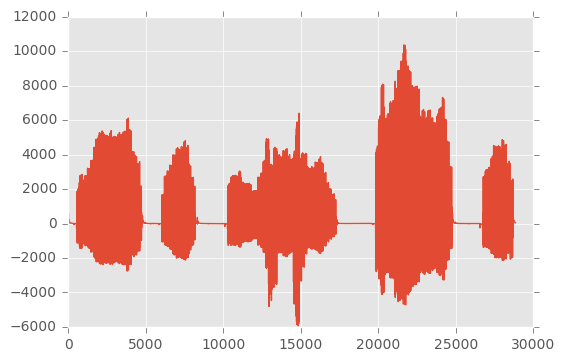

In [103]:
plt.plot(outwav)

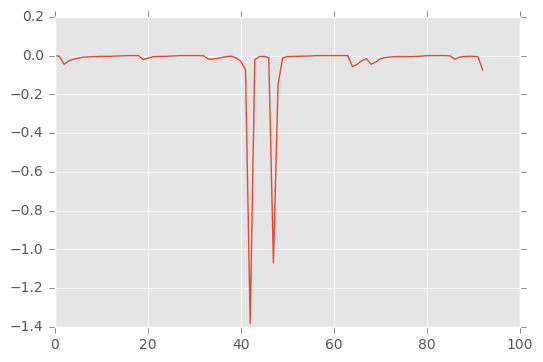

In [299]:
plt.plot(abe_streams[:,1])

In [316]:
resample_no_interp(arr, 1, 2, axis=0).shape

(6, 2)

2017-01-18 16:46:41,552 root         INFO     Testing for all pars with bin_size=7, history_size=15:
2017-01-18 16:46:43,023 root         INFO     sv shape (56, 108, 65), target shape (65, 93), len_samples 19503
2017-01-18 16:46:43,534 root         INFO     kernel shape (897,), sv_shape (56, 108, 6), len_samples 19503
2017-01-18 16:46:44,930 root         INFO     sv shape (56, 108, 65), target shape (65, 93), len_samples 19503
2017-01-18 16:46:45,365 root         INFO     kernel shape (897,), sv_shape (56, 108, 6), len_samples 19503
2017-01-18 16:46:46,700 root         INFO     sv shape (56, 108, 65), target shape (65, 93), len_samples 19503
2017-01-18 16:46:47,132 root         INFO     kernel shape (897,), sv_shape (56, 108, 6), len_samples 19503


In [283]:
every_test[3].shape

(3, 6, 93)

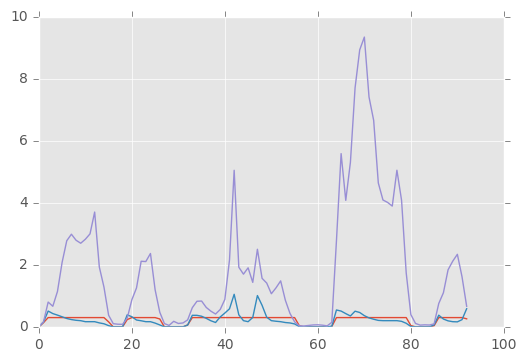

In [286]:
plt.plot(every_test[3][:, 0, :].T);

In [244]:
bins = [5, 6, 7, 8, 9, 10, 12, 15]
histories = [5, 6, 7, 8, 9, 10, 12, 15, 17, 20, 22, 25, 27]
tests_sweep = []
for bs in bins:
    bs_sweep = []
    for hs in histories:
        logger.info('Testing with bs={0}, hs={1}:'.format(bs, hs))
        ev_tst = altogether_test(alpha, syn.np_mulog(beta, 256), envelope,
                             units_list,
                             motiff_starts_kwik[trials_train],
                             motiff_starts_kwik[trials_test], 
                             bin_size=bs, 
                             history_bins=hs, 
                             s_f=s_f, 
                             nl_alpha = transform_alpha, 
                             nl_beta = transform_beta, 
                             nl_env = transform_env
                            )
        bs_sweep.append(ev_tst)
    tests_sweep.append(bs_sweep)

2016-12-08 17:22:58,779 root         INFO     Testing with bs=5, hs=5:
2016-12-08 17:22:58,783 root         INFO     Testing for all pars with bin_size=5, history_size=5:
2016-12-08 17:23:01,944 root         INFO     kernel shape (337,), sv_shape (56, 136, 6), len_samples 19503
2016-12-08 17:23:04,908 root         INFO     kernel shape (337,), sv_shape (56, 136, 6), len_samples 19503
2016-12-08 17:23:07,814 root         INFO     kernel shape (337,), sv_shape (56, 136, 6), len_samples 19503
2016-12-08 17:23:07,821 root         INFO     Testing with bs=5, hs=6:
2016-12-08 17:23:07,822 root         INFO     Testing for all pars with bin_size=5, history_size=6:
2016-12-08 17:23:10,742 root         INFO     kernel shape (393,), sv_shape (56, 137, 6), len_samples 19503
2016-12-08 17:23:13,676 root         INFO     kernel shape (393,), sv_shape (56, 137, 6), len_samples 19503
2016-12-08 17:23:16,616 root         INFO     kernel shape (393,), sv_shape (56, 137, 6), len_samples 19503
2016-12-08

In [232]:
len(tests_sweep)
n_bs

7

In [235]:
tests_sweep[5][2][2]

array([ 0.18780506,  0.29427109,  0.18832537])

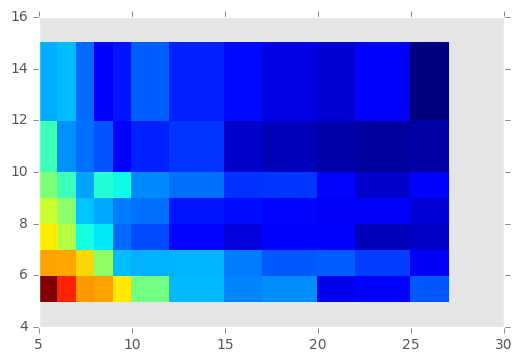

In [274]:
import itertools
n_bs = len(bins)
n_hs = len(histories)

res_array = np.zeros([n_bs, n_hs, 3])
for b, h in itertools.product(range(n_bs), range(n_hs)):
    res_array[b, h, :] = tests_sweep[b][h][2]

plt.pcolormesh(histories, bins, res_array[:,:,0])

(660,)


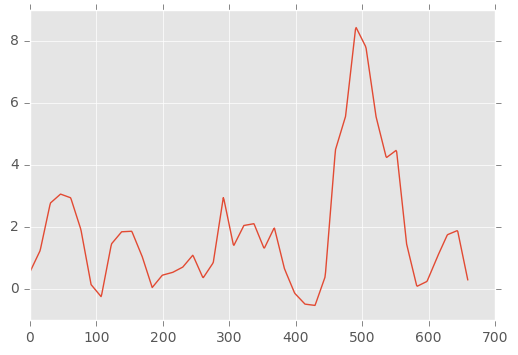

In [19]:
def resample_interp(x, s_f, new_s_f):
    t = np.linspace(0, x.size/s_f, x.size)
    #print t
    new_t = np.linspace(0, x.size/s_f, np.int(x.size*new_s_f/s_f))
    print new_t.shape
    return np.interp(new_t, t, x)

y = resample_interp(predict[3,:], 1, bin_size)
plt.plot(y)


In [23]:
ms_env.shape

(1, 651)

In [20]:
from decoder import linear
reload(ld)
big_r = ld.make_big_r(sv, history_bins)
big_r.shape

(2925, 1121)

In [21]:
def test_prediction(target, predict):
    

IndentationError: expected an indented block (<ipython-input-21-8dc4f6b324ac>, line 2)

In [100]:
motiff_starts_kwik = kwf.apply_rec_offset(kwik_file, vu.event.get_start(), vu.event.get_rec())
# make an array of n_bins * n_units * n_starts

bin_size = 5
history_bins = 20

# n_ms = int(len_samples/s_f*1000.)
# bin_size_samples = int(bin_size*s_f/1000)

# n_bins = int(np.floor((n_ms)/bin_size)) + history_bins
# n_starts = motiff_starts_kwik.size
# n_units = all_units.size


# sup_vec = np.empty([n_units, n_starts, n_bins], dtype=int)
# model_pars = bp.col_binned(np.array([alpha, beta]), bin_size_samples)

# for i, unit_meta in enumerate(all_units):
#     clu = unit_meta['clu']
#     unit = Unit(clu, kwik_file=kwik_file)
#     rs = unit.get_raster(motiff_starts_kwik - int(history_bins*bin_size*s_f/1000), 
#                          n_ms + bin_size*(history_bins-1), 
#                          span_is_ms=True, 
#                          return_ms=True)
#     sup_vec[i, :, :] = bp.col_binned(sparse_raster(rs), bin_size)
    
# good_units = np.where([np.any(sup_vec[u, :, :]) for u in range(sup_vec.shape[0])])
# god_vec = sup_vec[good_units,:,:][0]

def gimme_good_vec(starts, len_samples, all_units, kwik_file, alpha, beta,
                   s_f=30000, bin_size=10, history_bins=1):
    n_ms = int(len_samples/s_f*1000.)
    bin_size_samples = int(bin_size*s_f/1000.)
    
    n_bins = int(np.floor((n_ms)/bin_size)) + history_bins
    n_starts = starts.size
    n_units = all_units.size
    
    model_pars = bp.col_binned(np.array([alpha, beta, envelope]), bin_size_samples)
    sup_vec = np.empty([n_units, n_starts, n_bins], dtype=int)  
    for i, unit_meta in enumerate(all_units):
        clu = unit_meta['clu']
        unit = Unit(clu, kwik_file=kwik_file)
        rs = unit.get_raster(starts - int(history_bins*bin_size*s_f/1000), 
                             n_ms + bin_size*(history_bins-1), 
                             span_is_ms=True, 
                             return_ms=True)
        sup_vec[i, :, :] = bp.col_binned(sparse_raster(rs), bin_size)
    
    good_units = np.where([np.any(sup_vec[u, :, :]) for u in range(sup_vec.shape[0])])
    
    return sup_vec[good_units,:,:][0], model_pars

def unit_array(god_vec, i_u, i_tr, m, N):    
    x = np.vstack([god_vec[i_u, i_tr, i_0: i_0 + N-1] for i_0 in range(m)])
    return x

def all_units_array(god_vec, i_tr, m, N):
    x = np.hstack([unit_array(god_vec, u, i_tr, m, N) for u in range(god_vec.shape[0])])
    return np.hstack([np.ones([x.shape[0], 1]), x])

def fit_kernel(god_vec, target, trials, history_bins=10):
    # with this simple support vector make a linear decoder as in warland
    N = history_bins # history bins
    
    v = god_vec.shape[0] #number of units
    M = god_vec.shape[2] #len of recording
    m = M-N
    
    bigR = np.vstack([all_units_array(god_vec, i_tr, m, N) for i_tr in trials])
    s = np.tile(target[:m], trials.size)
    c = np.dot(bigR.T, bigR)
    rc = np.dot(bigR.T, s)
    f = np.dot(np.linalg.inv(c), rc)
    
    return f

def test_kernel(god_vec, target, kernel, trials, history_bins):
    N = history_bins
    M = god_vec.shape[2]
    m = M - N
    all_fits = np.vstack([np.dot(all_units_array(god_vec, tr_test, m, N), kernel) for tr_test in trials])
    all_fits[all_fits<0]=0
    
    all_residual = np.einsum('ij,ij', all_fits - target[:m], all_fits - target[:m])
    err = all_residual/np.einsum('i,i', target[:m], target[:m])  
    return err, all_fits


god_vec, model_pars = gimme_good_vec(motiff_starts_kwik, len_samples, all_units, kwik_file, alpha, beta, 
                                     s_f=30000, 
                                     bin_size=bin_size, 
                                     history_bins=1)

# with this simple support vector make a linear decoder as in warland
N = history_bins# history bins
M = god_vec.shape[2] #len of recording
m = M-N

n_trials = 65
f_fit_alpha = fit_kernel(god_vec, model_pars[0,:], np.arange(n_trials), history_bins=N)
f_fit_beta = fit_kernel(god_vec, model_pars[1,:], np.arange(n_trials), history_bins=N)
f_fit_env = fit_kernel(god_vec, model_pars[2,:], np.arange(n_trials), history_bins=N)
f_fit_betalog = fit_kernel(god_vec, mulog_vec(model_pars[1,:m]/350, 512), np.arange(n_trials), history_bins=N)

tr_test = 69
u_alpha = np.dot(all_units_array(god_vec, tr_test, m, N), f_fit_alpha)
u_beta = np.dot(all_units_array(god_vec, tr_test, m, N), f_fit_beta)
u_betalog = np.dot(all_units_array(god_vec, tr_test, m, N), f_fit_betalog)
u_env = np.dot(all_units_array(god_vec, tr_test, m, N), f_fit_env)

plt.plot(u_alpha)
plt.plot(model_pars[0,:m])

d, alfits = test_kernel(god_vec, model_pars[1,:], f_fit_beta, np.arange(67,69), N)


ValueError: could not broadcast input array from shape (71,137) into shape (71,138)

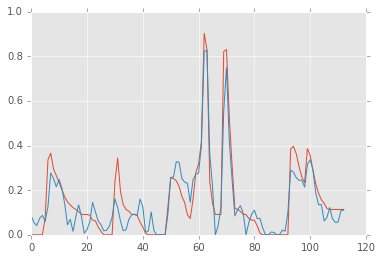

In [17]:
plt.plot(mulog_vec(model_pars[1,:m]/350, 512))
u_betalog[u_betalog<0]=0
plt.plot(u_betalog)

In [101]:
sup_vec

NameError: name 'sup_vec' is not defined

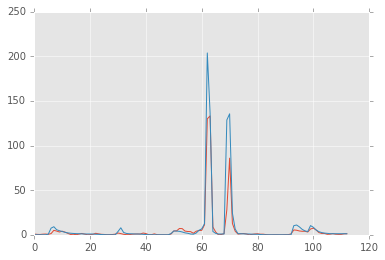

In [18]:
def inverse_mulog_vec(y, mu=256):
    return np.sign(y) * (np.power((1. + mu)*np.ones_like(y), np.fabs(y)) - 1.)/mu

beta = inverse_mulog_vec(u_betalog)*350
plt.plot(beta)
plt.plot(model_pars[1,:m])

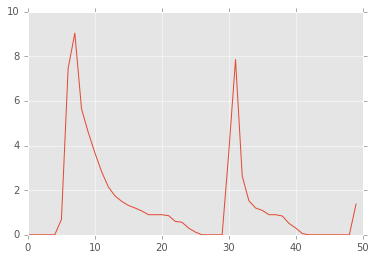

In [26]:
plt.plot(model_pars[1,:50])

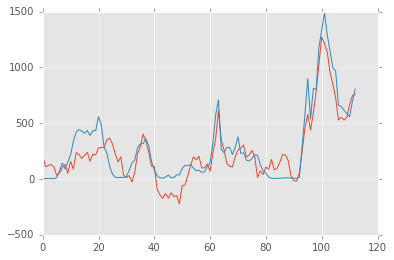

In [19]:
plt.plot(u_env)
plt.plot(model_pars[2,:m])

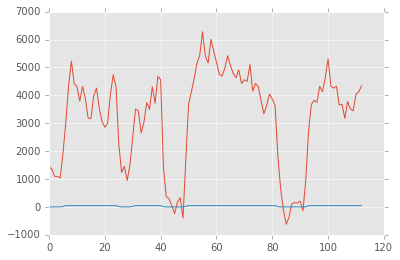

In [20]:
#u_alpha[u_alpha<45]=0.
#u_alpha[u_alpha>45]=-.15
plt.plot(u_alpha*100)
plt.plot(model_pars[0,:m])

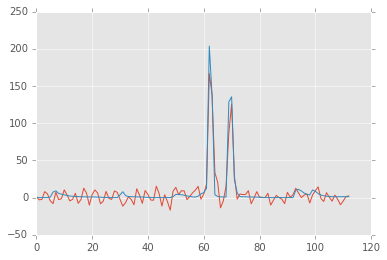

In [27]:
plt.plot(u_beta)
plt.plot(model_pars[1,:m])

In [21]:
def resample_interp(x, s_f, new_s_f):
    t = np.linspace(0, x.size/s_f, x.size)
    #print t
    new_t = np.linspace(0, x.size/s_f, np.int(x.size*new_s_f/s_f))
    print new_t.shape
    return np.interp(new_t, t, x)
